In [4]:
%run Functions.ipynb

In [5]:
import scipy.stats as stats
plt.style.use(["seaborn-dark-palette", "seaborn-whitegrid"])
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

In [6]:
def stat_analysis(df,column,asset="A"):
    
    start = df[column].index.min()
    end   = df[column].index.max()
    obser = len(df)
    n_funding = round(len(df) / (24*60) * 3)
    n_days = round(n_funding /3)
    MIN,MAX   = str(df[column].min())+"$", str(df[column].max())+"$"
    
    #avg   = df[column].mean()
    #std   = df[column].std()
    
    res = [start,end,obser,n_days,n_funding,MIN,MAX]
    res = pd.DataFrame(res, index=["start","end","obser","n_days","number_of_funding","min","max"], columns=[asset])
    
    return res

In [7]:
a = stat_analysis(df_xbt_bitmex,column="close", asset="xbt")
a.insert(1,"eth", stat_analysis(df_eth_bitmex,column="close"))
a.insert(2,"xrp", stat_analysis(df_xrp_bitmex,column="close"))
a.insert(3,"xbt_binance", stat_analysis(df_xbt_binance,column="close"))
a.insert(4,"eth_binance", stat_analysis(df_eth_binance,column="close"))
a.insert(5,"xrp_binance", stat_analysis(df_xrp_binance,column="close"))

a

,xbt,eth,xrp,xbt_binance,eth_binance,xrp_binance
start,2015-09-25 12:35:00,2018-08-02 09:07:00,2020-02-05 04:01:00,2019-09-08 17:58:00,2019-11-27 07:46:00,2020-01-06 08:22:00
end,2020-08-06 23:59:00,2020-08-06 23:59:00,2020-08-06 23:59:00,2020-08-06 23:59:00,2020-08-06 23:59:00,2020-08-06 23:59:00
obser,2560063,1059321,264733,480139,365310,307664
n_days,1778,736,184,333,254,214
number_of_funding,5333,2207,552,1000,761,641
min,232.9$,80.9$,0.1068$,3706.96$,85.06$,0.1042$
max,20090.5$,435.5$,0.3461$,12134.65$,416.44$,0.3461$


In [8]:
ret = df_xbt_bitmex["return_5_min_cum_each_5"][df_xbt_bitmex["return_5_min_cum_each_5"]!= 0]

['df_eth_bitmex', 'asset']
189637
mean 7.451711347396401e-06
stdv 0.004131035052676227
skew 80.23587836725224
kurt 21313.29296034563


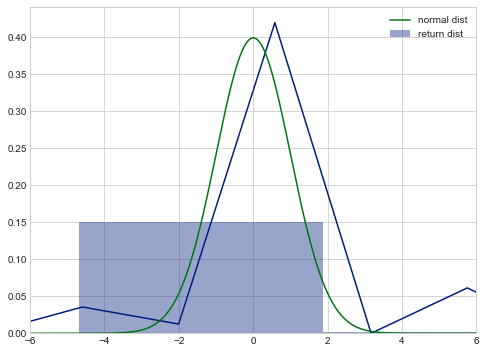

17233
mean 5.349539577696488e-05
stdv 0.010423800309347897
skew 0.006022187342913954
kurt 34.18728595260988


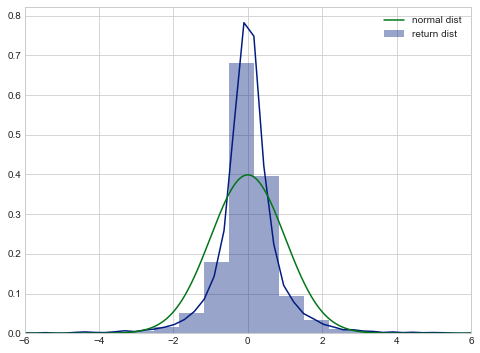

732
mean 0.0011536474572627223
stdv 0.04779087398536973
skew -0.3244570450208416
kurt 4.330190147507411


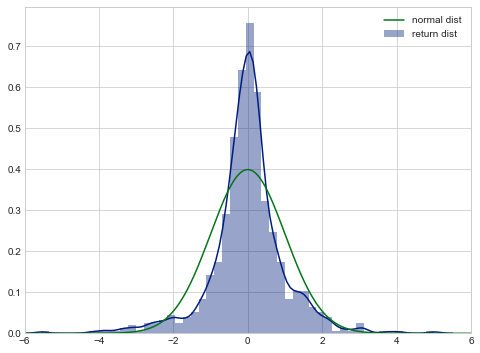

........


In [9]:
import seaborn as sns

minutes = [5,60,1440]
assets  = [df_eth_bitmex]

for asset in assets:
    print(namestr(asset, globals()))
    df = asset
    for minute in minutes:
        column = "return_%s_min_cum_each_%s" % (minute,minute)
        subset_df = df[df[column]!=0]
        print(len(subset_df))
        print("mean",np.mean(subset_df[column]))
        print("stdv",np.std(subset_df[column]))
        print("skew",stats.skew(subset_df[column]))     #symmetry
        print("kurt",stats.kurtosis(subset_df[column])) #How tall is your dist
        
        subset_df[column] = (subset_df[column]-subset_df[column].mean())/subset_df[column].std()
        plt.figure(figsize=(8,6))
        sns.distplot(np.asarray(subset_df[column]), label="return dist")
        x = np.linspace(-6, 6, 1000)
        plt.plot(x, stats.norm.pdf(x, 0, 1), label="normal dist")
        plt.xlim(-6, 6)
        #plt.yscale("log")
        plt.legend()
        plt.show()
    print("........")


In [9]:
minutes = [5, 60, 1440]
assets  = [df_xbt_bitmex]

for asset in assets:
    print(namestr(asset, globals()))
    df = asset
    for minute in minutes:
        column = "return_%s_min_cum_each_%s" % (minute,minute)
        subset_df = df[column][df[column]!=0]
        print(len(subset_df))
     
        autocorr_xbt = TSA.acf(np.asarray(subset_df),nlags=15)
        autocorr_xbt = pd.DataFrame(autocorr_xbt, columns=["autocorr"])
        #plt.plot(autocorr_xbt[1:])
        autocorr_xbt["autocorr"][1:].plot(kind='bar', 
               color=(autocorr_xbt["autocorr"][1:] > 0).map({False: '#001C7F', True: '#017517'}))
        plt.xlabel("Lags")
        plt.ylim(-0.05,0.02)
        plt.show()
        print("........")
       # #001C7F, #017517


['df_xbt_bitmex', 'asset', 'df']
436052


KeyboardInterrupt: 

['df_xbt_bitmex', 'asset', 'df']
436052
42044
1773


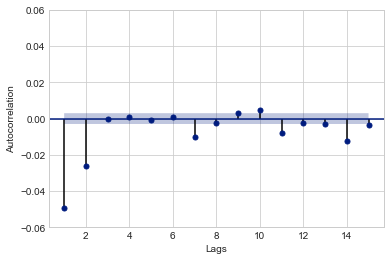

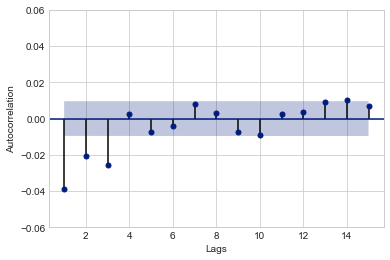

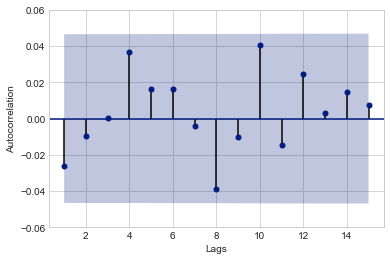

In [23]:
minutes = [5, 60, 1440]
assets  = [df_xbt_bitmex]
import statsmodels.api as sm


for asset in assets:
    print(namestr(asset, globals()))
    df = asset
    for minute in minutes:
        column = "return_%s_min_cum_each_%s" % (minute,minute)
        subset_df = df[column][df[column]!=0]
        print(len(subset_df))
        
        sm.graphics.tsa.plot_acf(np.asarray(subset_df), lags=15, title="", zero=False)
        plt.ylim(-0.06,0.06)
        plt.xlabel("Lags")
        plt.ylabel("Autocorrelation")
       # #001C7F, #017517
